Hypothesis to be tested : The Digits data set of scikit-learn library provides numerous data-sets that are useful for testing many problems of data analysis and prediction of the results. Some Scientist claims that it predicts the digit accurately 95% of the times. 

## Begin with importing libraries and the dataset

In [2]:
import pandas as pd
from sklearn.datasets import load_digits

In [3]:
digits=load_digits()

In [4]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

Let's check what these contain individually

In [10]:
for i in dir(digits):
    print(digits[i])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

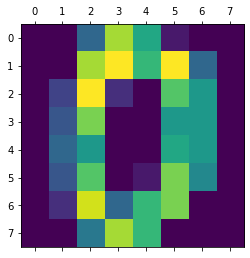

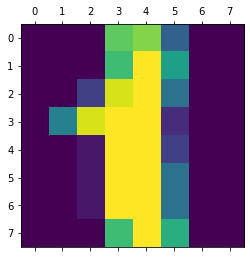

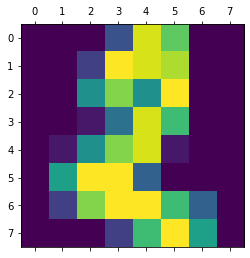

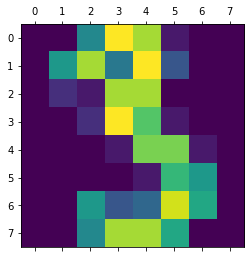

In [15]:
import matplotlib.pyplot as plt
for i in range(0,4):
    plt.matshow(digits.images[i])

These are the images that we have to train the model to recognize. Let's create a dataframe

In [19]:
df=pd.DataFrame(digits.data,columns=digits.feature_names)
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


This data has the individual pixel values for each image. As the images are 8x8 there will be 64 pixel values for each image. We have around 1797 images.

In [20]:
df.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [21]:
df.shape

(1797, 64)

In [24]:
df['Target']=digits.target
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

These are the actual values of the images. There are 0-9 target values.

In [25]:
df.shape

(1797, 65)

In [26]:
x=df.iloc[:,:-1]
y=df.Target

In [29]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_stand=scaler.fit_transform(x)

Scaling x values

In [31]:
from sklearn.model_selection import train_test_split

## Case 1:

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x_stand,y,test_size=0.1)

We will use SVM

In [35]:
from sklearn.svm import SVC
model=SVC()

In [36]:
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9888888888888889

## Case 2:

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x_stand,y,test_size=0.2)

In [38]:
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9833333333333333

## Case 3:

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x_stand,y,test_size=0.3)

In [40]:
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9925925925925926

In [60]:
model.predict(x_test)[4:8]

array([5, 5, 0, 5])

In [61]:
y_test[4:8]

176     5
1447    5
666     0
893     5
Name: Target, dtype: int64

In [63]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

<AxesSubplot:>

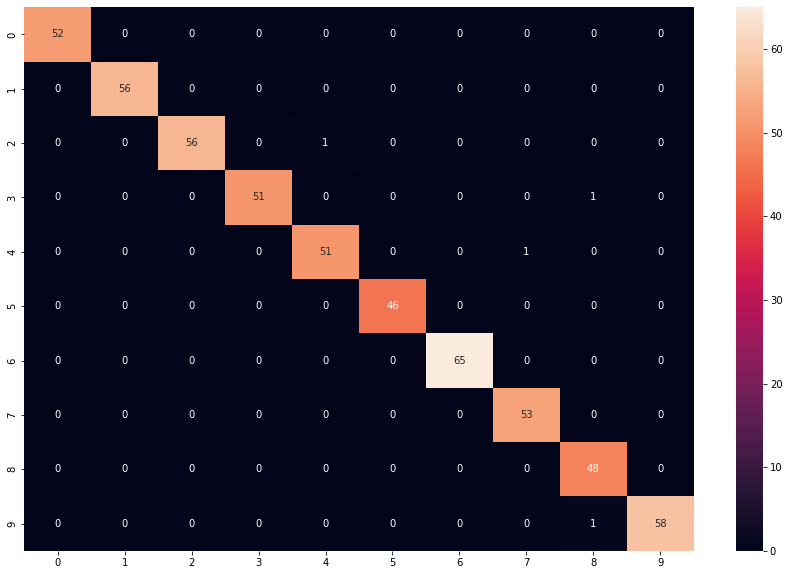

In [66]:
y_pred=model.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(15,10))
sns.heatmap(cm,annot=True)

In [67]:
from sklearn.metrics import classification_report
cr=classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        56
           2       1.00      0.98      0.99        57
           3       1.00      0.98      0.99        52
           4       0.98      0.98      0.98        52
           5       1.00      1.00      1.00        46
           6       1.00      1.00      1.00        65
           7       0.98      1.00      0.99        53
           8       0.96      1.00      0.98        48
           9       1.00      0.98      0.99        59

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



## Conclusion: 

The hypothesis is accepted. The digits dataset model predictions are always above 95%, highest one being 99.25%